In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
google_data=pd.read_csv("googleplaystore.csv")
google_data


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
#check the shape4
google_data.shape

(10841, 13)

In [5]:
#checkthe dataset value
google_data.describe() #as of now we can see only rting as it has numeri value, we'll change others into numeric and will check again.
#we can see this is right skew mean>median

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

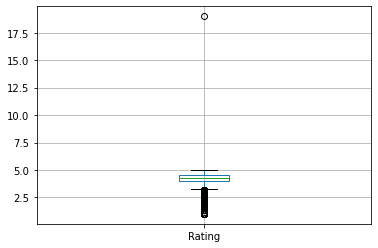

In [6]:
#now plot box plot on the ratings to check the outliers and we'll handle it
google_data.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

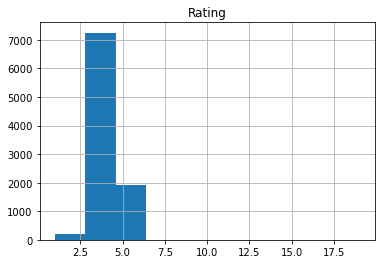

In [7]:
#plot histogram to check the skewness
google_data.hist() #as we can see its a right skew

In [8]:
#use info to check null values4
google_data.info()
# we can see ratings, type, content etc have null as they are not 10841

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# data cleaning

In [9]:
#count the no. of missing values in the dtaframe
google_data.isnull() #this will give true false, which will not clear complete picture
#use sum
google_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
#check the outlier in ratings
google_data[google_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
#now we'll drop that outlier
google_data.drop([10472],inplace=True)

In [12]:
#if we ant to check if its drop or not
google_data[10471:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<AxesSubplot:>

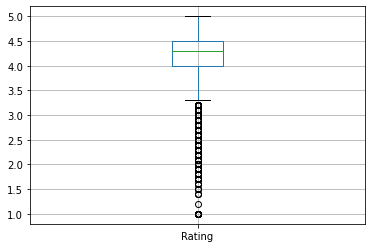

In [13]:
google_data.boxplot()

In [14]:
google_data.Rating.isnull().sum()

1474

# data imputation and manipulation

In [15]:
#fill null vaues with appropriate values using aggregation mean, median, mode
#define function to impute median value in the ratings column
def impute_median(abc):
    return abc.fillna(abc.median())

In [16]:
#use function and impute the values in Ratngs
google_data.Rating= google_data['Rating'].transform(impute_median)

In [17]:
#count he no. of value in the dataset
google_data.isnull().sum()
#we can see ratings are added will median value

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [18]:
#now for others we'll use mode, mode is use for categorical values.
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]),inplace=True)
google_data['Current Ver'].fillna(str(google_data['Current Ver'].mode().values[0]),inplace=True)
google_data['Android Ver'].fillna(str(google_data['Android Ver'].mode().values[0]),inplace=True)

In [19]:
#check of null is updated
google_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [20]:
print(google_data['Reviews'].dtypes)#checking the datatype of Reviews column
print(google_data['Rating'].dtypes)


object
float64


In [21]:
#convert price, rating, and review into numerical value 
#checking if $ then change to '', else leave it as it is
google_data['Price']= google_data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))

#now conver to int.
google_data['Price']= google_data['Price'].apply(lambda x: float(x))
#convert revies to numeric
google_data['Reviews']= pd.to_numeric(google_data['Reviews'],errors='coerce') #coerce is used to ignore ig they encountered any error



In [22]:
#same thing we'll do with install and remove '+' sign
google_data['Installs']= google_data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
#remove comma aslo from installs
google_data['Installs']= google_data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
google_data['Installs']= google_data['Installs'].apply(lambda x: float(x))

In [23]:
google_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
#now check using describe we get other files also which i we just clean
google_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


# Data visualization

In [25]:
#do groupging as pe the category
grp= google_data.groupby('Category')
x= grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z= grp['Reviews'].agg(np.mean)

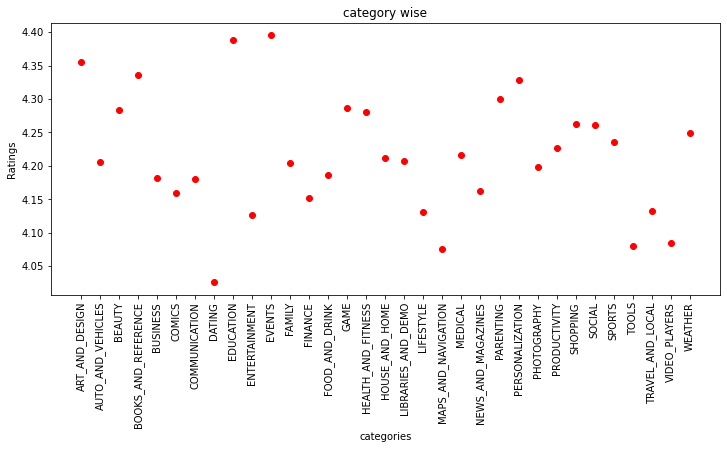

In [26]:
#now pot the x
plt.figure(figsize=(12,5))
plt.plot(x, 'ro')  #ro means we need . type graph
plt.xticks(rotation=90)
plt.xlabel("categories")
plt.ylabel("Ratings")
plt.title("category wise")
plt.show()

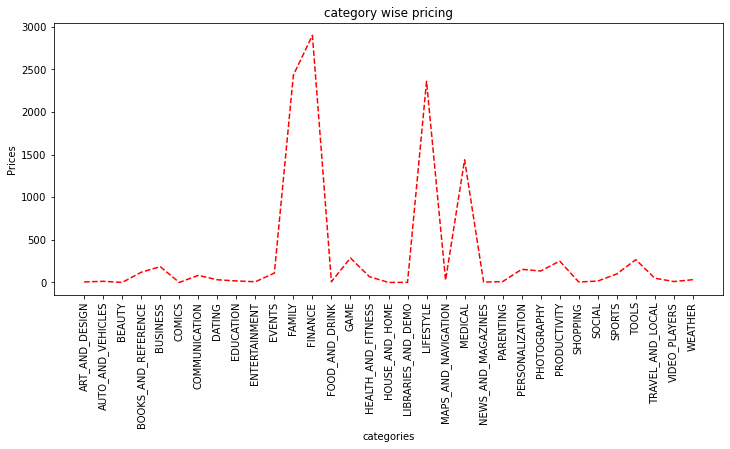

In [27]:
#plt y
plt.figure(figsize=(12,5))
plt.plot(y, 'r--')  #ro means we need . type graph
plt.xticks(rotation=90)
plt.xlabel("categories")
plt.ylabel("Prices")
plt.title("category wise pricing")
plt.show()

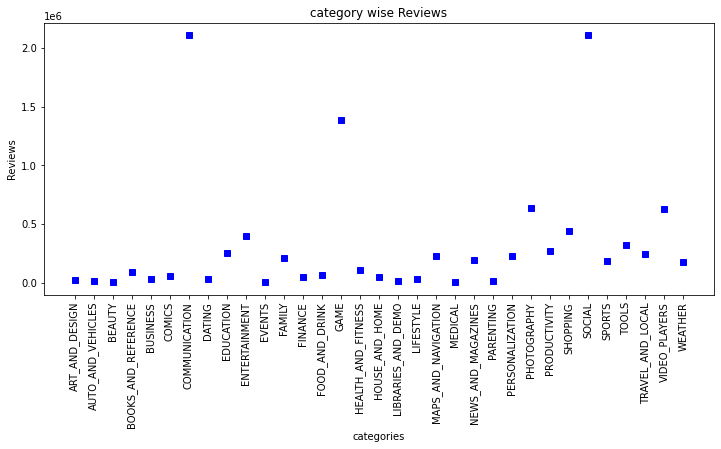

In [28]:
#as per z
plt.figure(figsize=(12,5))
plt.plot(z, 'bs')  #ro means we need . type graph
plt.xticks(rotation=90)
plt.xlabel("categories")
plt.ylabel("Reviews")
plt.title("category wise Reviews")
plt.show()